
# CAR PRICE PREDICTION

In [77]:
#IMPORTING NECESSARY LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import pickle as pkl

In [78]:
#checking the versions of the imported libraries
np.__version__,pd.__version__,sns.__version__,matplotlib.__version__

('1.24.4', '1.5.3', '0.12.2', '3.7.2')

In [79]:
#loading the data file
df=pd.read_csv('D:\ML\Cars Price Prediction Project\Cars.csv')
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [80]:
#describing the dataframe for count,min,max
df.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [81]:
#number of rows and columns
df.shape

(8128, 13)

In [82]:
#information of the column name, datatypes, null ad not null values,etc.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [83]:
#printing the columns in the dataframe
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

In [84]:
df.fuel.unique()

array(['Diesel', 'Petrol', 'LPG', 'CNG'], dtype=object)

In [85]:
#Removing the LPG and CNG fuel type
mask = df['fuel'].isin(['CNG','LPG'])
#select all the rows except cng and lpg
df = df [~mask]
df
df.fuel.unique()

array(['Diesel', 'Petrol'], dtype=object)

In [86]:
#dropping torque column
df.drop(['torque'], axis=1, inplace = True)

In [87]:
#peinting the data types of all the columns before to find out the relevant columns whose data types needs to be changed
df.dtypes

name              object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage           object
engine            object
max_power         object
seats            float64
dtype: object

In [88]:
#replacing the owner values to 1,2,3,4 without using label encoder since we are customizing the owner types basd on our need

df['owner'] = df['owner'].replace(
    to_replace=['First Owner', 'Second Owner', 'Third Owner', 'Fourth & Above Owner'],
    value=['1', '2', '3','4'])
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,1,23.4 kmpl,1248 CC,74 bhp,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,2,21.14 kmpl,1498 CC,103.52 bhp,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,3,17.7 kmpl,1497 CC,78 bhp,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,1,23.0 kmpl,1396 CC,90 bhp,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,1,16.1 kmpl,1298 CC,88.2 bhp,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,1,18.5 kmpl,1197 CC,82.85 bhp,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,4,16.8 kmpl,1493 CC,110 bhp,5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,1,19.3 kmpl,1248 CC,73.9 bhp,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,1,23.57 kmpl,1396 CC,70 bhp,5.0


In [89]:
#converting the column 'name' to 'brand'
df.rename(columns={'name':'brand'}, inplace = True)

In [90]:
#shortening the brand name by keeping the first part of the name only
df['brand']=df['brand'].str.split().str[0]
df.head(5)

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,1,23.4 kmpl,1248 CC,74 bhp,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,2,21.14 kmpl,1498 CC,103.52 bhp,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,3,17.7 kmpl,1497 CC,78 bhp,5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,1,23.0 kmpl,1396 CC,90 bhp,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,1,16.1 kmpl,1298 CC,88.2 bhp,5.0


LABEL ENCODING

In [91]:
#encoding the following columns for the model to read the data better
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['brand']= label_encoder.fit_transform(df['brand'])
df['seller_type']= label_encoder.fit_transform(df['seller_type'])
df['fuel']= label_encoder.fit_transform(df['fuel'])
df['transmission']= label_encoder.fit_transform(df['transmission'])

In [92]:
df

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,20,2014,450000,145500,0,1,1,1,23.4 kmpl,1248 CC,74 bhp,5.0
1,27,2014,370000,120000,0,1,1,2,21.14 kmpl,1498 CC,103.52 bhp,5.0
2,10,2006,158000,140000,1,1,1,3,17.7 kmpl,1497 CC,78 bhp,5.0
3,11,2010,225000,127000,0,1,1,1,23.0 kmpl,1396 CC,90 bhp,5.0
4,20,2007,130000,120000,1,1,1,1,16.1 kmpl,1298 CC,88.2 bhp,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8123,11,2013,320000,110000,1,1,1,1,18.5 kmpl,1197 CC,82.85 bhp,5.0
8124,11,2007,135000,119000,0,1,1,4,16.8 kmpl,1493 CC,110 bhp,5.0
8125,20,2009,382000,120000,0,1,1,1,19.3 kmpl,1248 CC,73.9 bhp,5.0
8126,28,2013,290000,25000,0,1,1,1,23.57 kmpl,1396 CC,70 bhp,5.0


In [93]:
#extracting only the numeric part of the columns and converting to float datatype
df['mileage']= df['mileage'].str.split().str[0].astype(float)
df['engine']= df['engine'].str.split().str[0].astype(float)
df['max_power']= df['max_power'].str.split().str[0].astype(float)

In [94]:
#checking the changed data type
df.dtypes

brand              int32
year               int64
selling_price      int64
km_driven          int64
fuel               int32
seller_type        int32
transmission       int32
owner             object
mileage          float64
engine           float64
max_power        float64
seats            float64
dtype: object

In [95]:
#dropping the test drive car rows for better analysis
df.owner.unique()
df = df.drop(df[df['owner'] == 'Test Drive Car'].index)

In [96]:
df.seats.unique()

array([ 5.,  4., nan,  7.,  8.,  6.,  9., 10., 14.,  2.])

In [97]:
#Transforming the selling_price and km_driven by logarithmic transform
y = np.log(df['selling_price'])
df['selling_price']=np.log(df['selling_price'])
df['km_driven']=np.log(df['km_driven'])

df.head()

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,20,2014,13.017003,11.887931,0,1,1,1,23.40,1248.0,74.00,5.0
1,27,2014,12.821258,11.695247,0,1,1,2,21.14,1498.0,103.52,5.0
2,10,2006,11.970350,11.849398,1,1,1,3,17.70,1497.0,78.00,5.0
3,11,2010,12.323856,11.751942,0,1,1,1,23.00,1396.0,90.00,5.0
4,20,2007,11.775290,11.695247,1,1,1,1,16.10,1298.0,88.20,5.0


In [98]:
#Final Data Description
df.describe()

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,mileage,engine,max_power,seats
count,8028.000000,8028.000000,8028.000000,8028.000000,8028.000000,8028.000000,8028.000000,7814.000000,7814.000000,7820.000000,7814.000000
mean,18.004235,2013.815521,12.979337,10.859882,0.451794,0.890010,0.869706,19.391962,1462.914640,91.819726,5.421551
std,7.388504,4.030836,0.838039,0.868444,0.497702,0.395861,0.336648,4.001972,504.759742,35.804513,0.963125
min,0.000000,1983.000000,10.308919,6.907755,0.000000,0.000000,0.000000,0.000000,624.000000,0.000000,2.000000
25%,11.000000,2011.000000,12.468437,10.463103,0.000000,1.000000,1.000000,16.780000,1197.000000,68.850000,5.000000
50%,20.000000,2015.000000,13.017003,11.002100,0.000000,1.000000,1.000000,19.300000,1248.000000,82.400000,5.000000
75%,20.000000,2017.000000,13.429848,11.492723,1.000000,1.000000,1.000000,22.320000,1582.000000,102.000000,5.000000
max,31.000000,2020.000000,16.118096,14.674366,1.000000,2.000000,1.000000,42.000000,3604.000000,400.000000,14.000000


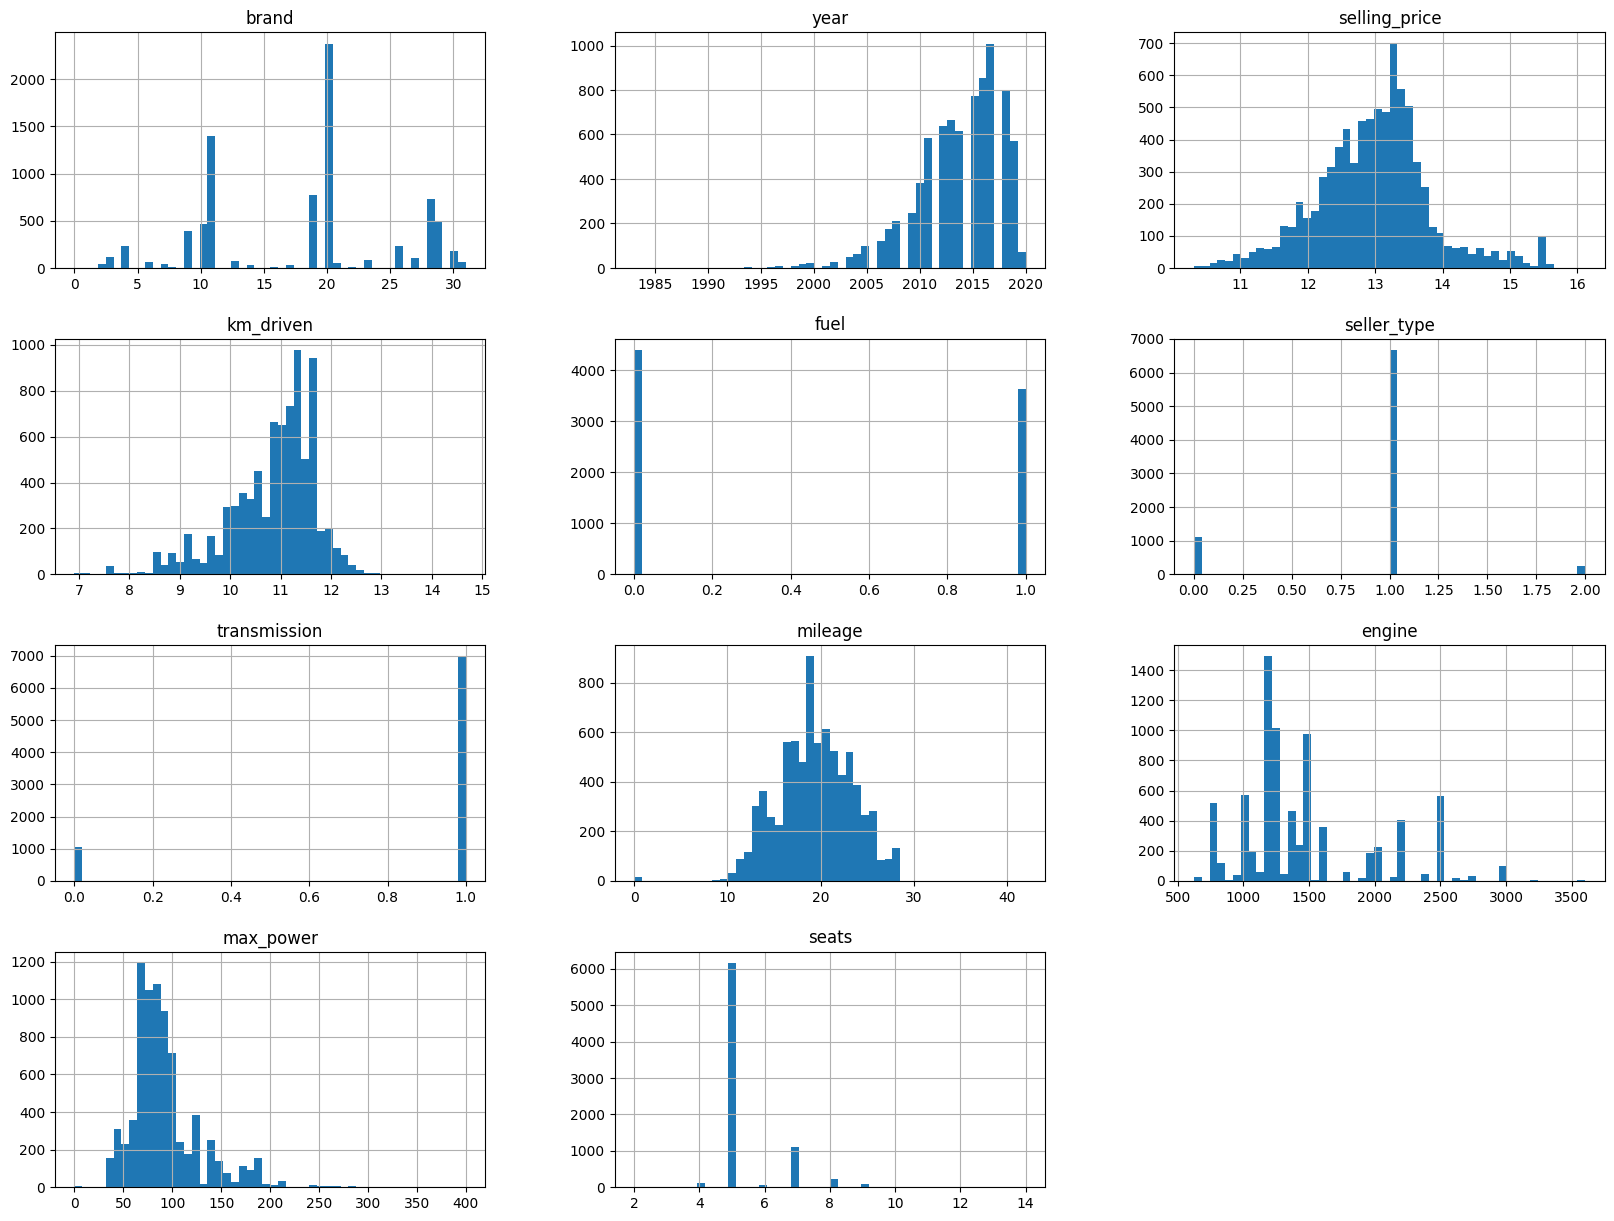

In [99]:
#Plotting Histogram
# plotting histograms for all attributes
df.hist(bins=50, figsize=(20,15))
plt.show()

<Axes: xlabel='brand', ylabel='count'>

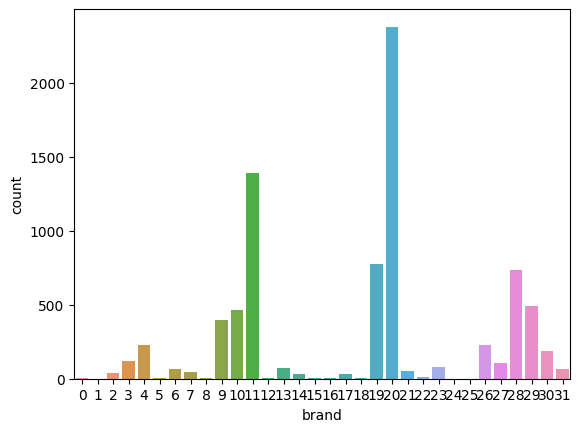

In [100]:
# How many cars of a certain brand?
sns.countplot(data = df, x = 'brand')

Text(0.5, 0, 'Owner')

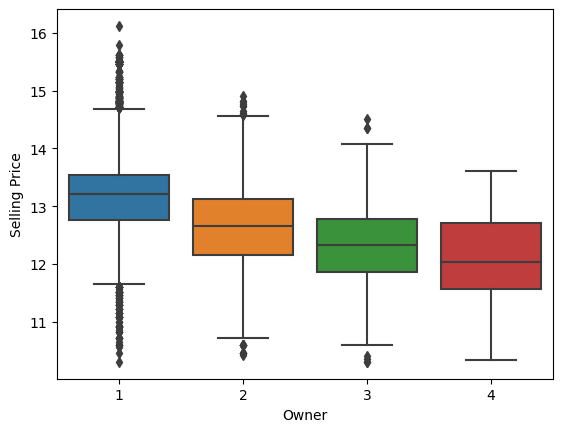

In [101]:
# Building a box plot
sns.boxplot(x = df["owner"], y = df["selling_price"]);
plt.ylabel("Selling Price")
plt.xlabel("Owner")

<Axes: xlabel='mileage', ylabel='km_driven'>

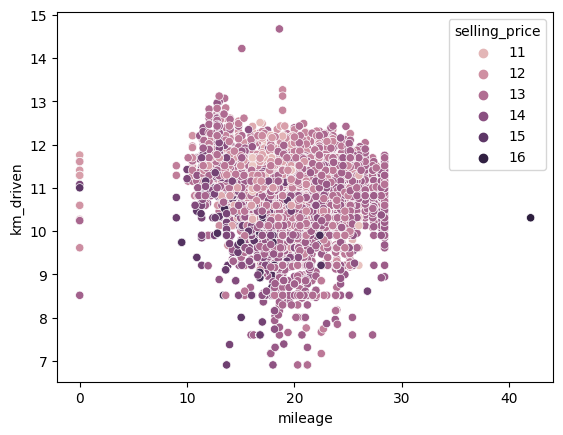

In [102]:
#using a scatterplot
sns.scatterplot(x = df['mileage'], y = df['km_driven'], hue=df['selling_price'])

<Axes: xlabel='selling_price', ylabel='Density'>

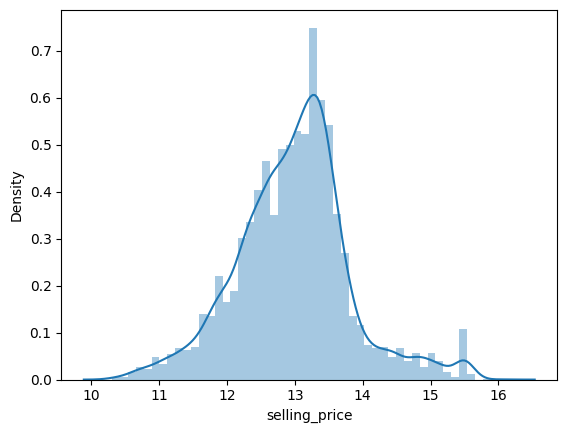

In [103]:
#Drawing a distribution plot
sns.distplot(df['selling_price'])

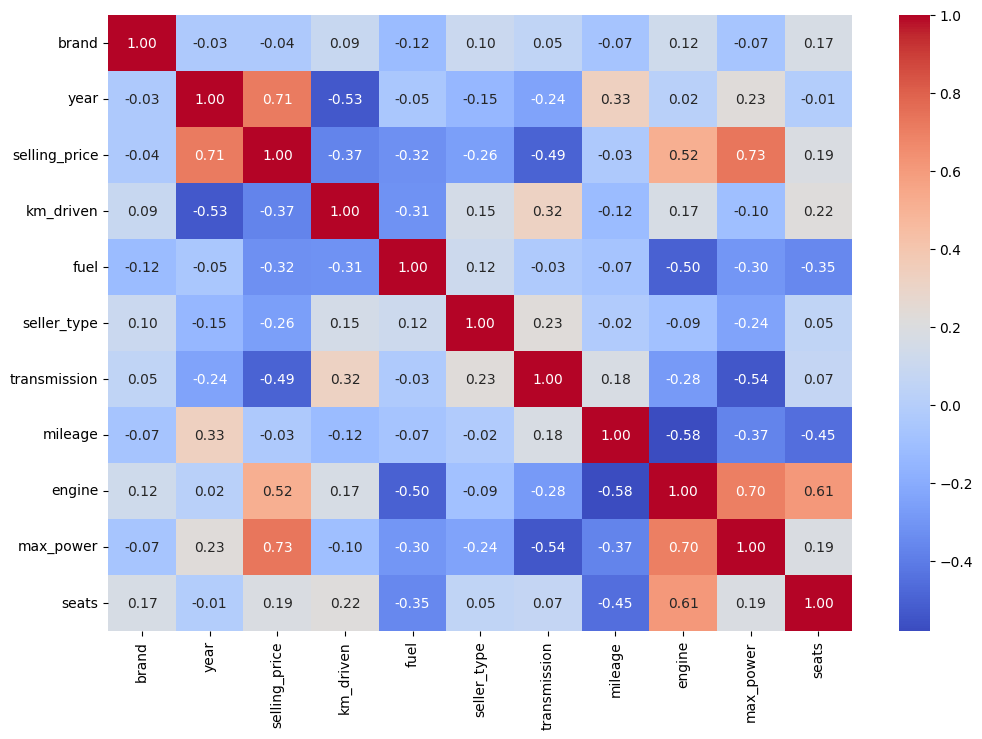

In [104]:
#Drawing a correlation matrix for feature selection process
df = df.select_dtypes(exclude=[object])
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True,cmap='coolwarm', fmt ='.2f')
plt.show()

Based on the correlation matrix, we can see that year,km_driven,engine and max_power are the best features that can be used for predicting the selling_price since they have high correlation. But 

<Axes: xlabel='x', ylabel='y'>

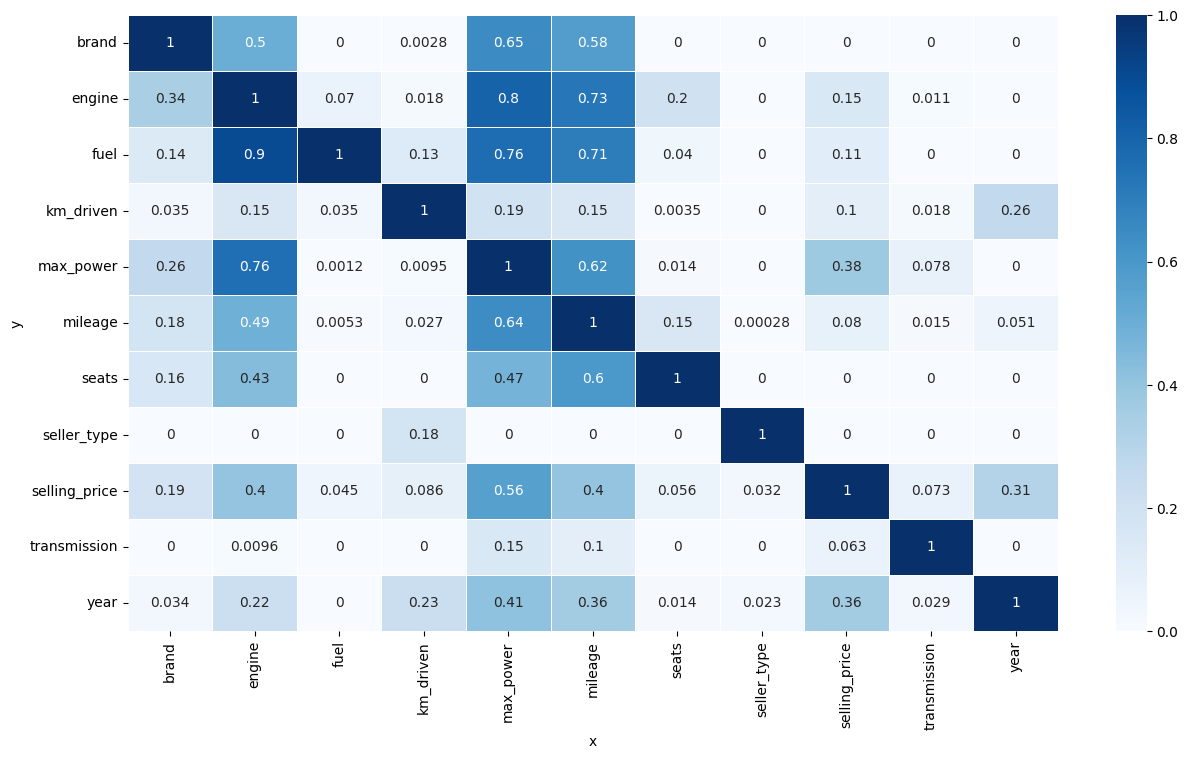

In [105]:
import ppscore as pps

# before using pps, let's drop country and year
dfcopy = df.copy()

#this needs some minor preprocessing because seaborn.heatmap unfortunately does not accept tidy data
matrix_df = pps.matrix(dfcopy)[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')

#plot
plt.figure(figsize = (15,8))
sns.heatmap(matrix_df, vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=True)

Although the correlation is high for year feature, based on the domain knowledge and real life scenario, it doesn't make sense that I am paying more money for an older car, so I am dropping the year feature.

FEATURE SELECTION

In [106]:
#x is our strong features based on the heatmap
X = df[['mileage','max_power','engine']]

#y is simply the target we want to estimate
y = df["selling_price"]

TRAIN TEST SPLIT

In [107]:
#splitting the dataset into train and test datasets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3, random_state = 42)


In [108]:
max_power = X_train['max_power'].median()
engine = X_train['engine'].median()
mileage = X_train['mileage'].mean()

In [109]:
# Let's check shapes of all X_train, X_test, y_train, y_test
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (5619, 3)
Shape of X_test:  (2409, 3)
Shape of y_train:  (5619,)
Shape of y_test:  (2409,)


PREPROCESSING

In [110]:
#checking for null values in train dataset
X_train[['mileage','engine','max_power']].isna().sum()

mileage      154
engine       154
max_power    149
dtype: int64

In [111]:
#checking in test dataset for null values
X_test[['mileage','engine','max_power']].isna().sum()

mileage      60
engine       60
max_power    59
dtype: int64

In [112]:
#checking for null values in y_train
y_train.isna().sum()

0

In [113]:
#checking in y_test for null values
y_test.isna().sum()

0

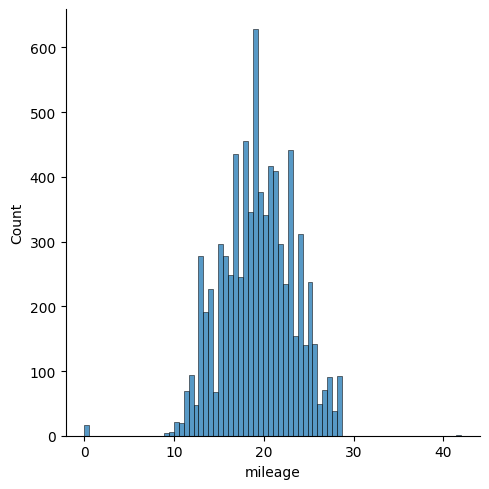

In [114]:
#using the distribution plot to determine what to use for missingvalues replacement(for deciding between mean,median and mode)
sns.displot(data=df, x='mileage')

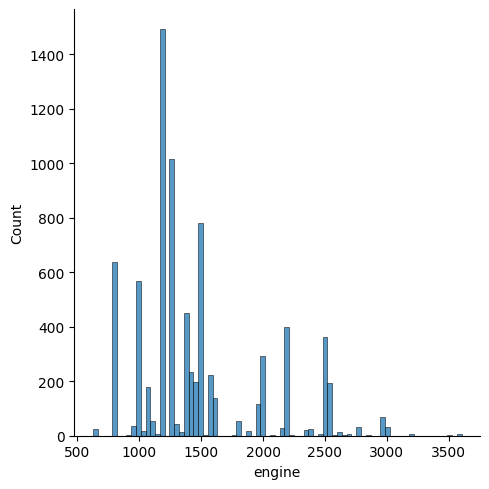

In [115]:
sns.displot(data=df, x='engine')

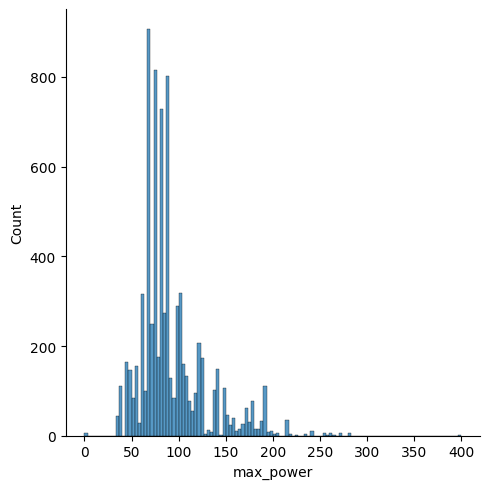

In [116]:
sns.displot(data=df, x='max_power')

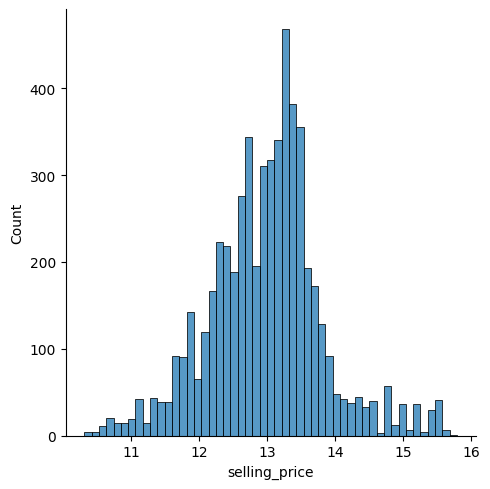

In [117]:
sns.displot(y_train)

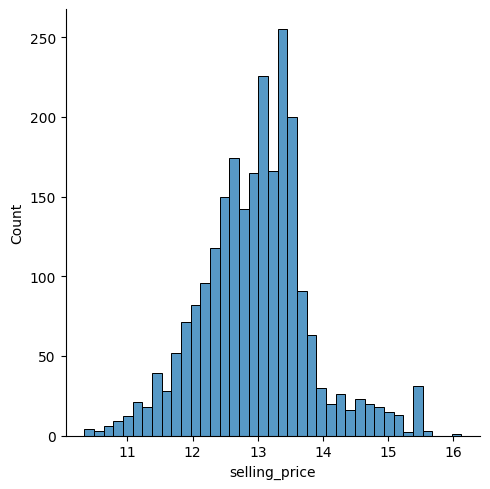

In [118]:
sns.displot(y_test)

since y_test and y_train doesn't have null data, no need to imputate the data

In [119]:
#let's fill the test set first!
X_test['mileage'].fillna(X_test['mileage'].mean(), inplace=True)
X_test['engine'].fillna(X_test['engine'].median(), inplace=True)
X_test['max_power'].fillna(X_test['max_power'].median(), inplace=True)

In [120]:
#filling the train set now
X_train['mileage'].fillna(X_train['mileage'].mean(), inplace=True)
X_train['engine'].fillna(X_train['engine'].median(), inplace=True)
X_train['max_power'].fillna(X_train['max_power'].median(), inplace=True)

In [121]:
#checking the null values in test set
X_test[['mileage', 'engine','max_power']].isna().sum()

mileage      0
engine       0
max_power    0
dtype: int64

In [122]:
#checking the null values in train set
X_train[['mileage', 'engine','max_power']].isna().sum()

mileage      0
engine       0
max_power    0
dtype: int64

FEATURE SCALING

In [123]:
from sklearn.preprocessing import StandardScaler
# feature scaling helps improve reach convergence faster
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

In [124]:
# Let's check shapes of all X_train, X_test, y_train, y_test
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (5619, 3)
Shape of X_test:  (2409, 3)
Shape of y_train:  (5619,)
Shape of y_test:  (2409,)


In [125]:
from sklearn.linear_model import LinearRegression  #we are using regression models
from sklearn.metrics import mean_squared_error, r2_score

lr = LinearRegression()
lr.fit(X_train, y_train)
yhat = lr.predict(X_test)
#print(yhat)
print("MSE: ", mean_squared_error(y_test, yhat))
print("r2: ", r2_score(y_test, yhat))

MSE:  0.2765208686229798
r2:  0.606984022747793


CROSS-VALIDATION AND GRID SEARCH

In [126]:
from sklearn.linear_model import LinearRegression  #we are using regression models
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


# models that we will be using, put them in a list
algorithms = [LinearRegression(), SVR(), KNeighborsRegressor(), DecisionTreeRegressor(random_state = 0), 
              RandomForestRegressor(n_estimators = 100, random_state = 0)]

# The names of the models
algorithm_names = ["Linear Regression", "SVR", "KNeighbors Regressor", "Decision-Tree Regressor", "Random-Forest Regressor"]

In [127]:
y_train.isna().sum()

0

In [128]:
from sklearn.model_selection import KFold, cross_val_score

#lists for keeping mse
train_mse = []
test_mse = []

#defining splits
kfold = KFold(n_splits=5, shuffle=True)

for i, model in enumerate(algorithms):
    scores = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
    print(f"{algorithm_names[i]} - Score: {scores}; Mean: {scores.mean()}")

Linear Regression - Score: [-0.268822   -0.29784217 -0.27539884 -0.28906907 -0.27565236]; Mean: -0.2813568895049513


SVR - Score: [-0.23063002 -0.22038765 -0.23231062 -0.23955594 -0.21779284]; Mean: -0.22813541197253998
KNeighbors Regressor - Score: [-0.10876718 -0.1114268  -0.11925943 -0.11588573 -0.11090719]; Mean: -0.11324926601574185
Decision-Tree Regressor - Score: [-0.12187347 -0.09929366 -0.08755461 -0.09152965 -0.11319774]; Mean: -0.1026898254676677
Random-Forest Regressor - Score: [-0.08917194 -0.08757224 -0.10204642 -0.09476434 -0.09668263]; Mean: -0.0940475154685234


GRID SEARCH

In [129]:
from sklearn.model_selection import GridSearchCV

param_grid = {'bootstrap': [True], 'max_depth': [5, 10, None],
              'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15]}

rf = RandomForestRegressor(random_state = 1)

grid = GridSearchCV(estimator = rf, 
                    param_grid = param_grid, 
                    cv = kfold, 
                    n_jobs = -1, 
                    return_train_score=True, 
                    refit=True,
                    scoring='neg_mean_squared_error')

# Fit your grid_search
grid.fit(X_train, y_train);  #fit means start looping all the possible parameters

In [130]:
grid.best_params_

{'bootstrap': True, 'max_depth': None, 'n_estimators': 15}

In [131]:
# Find your grid_search's best score
best_mse = grid.best_score_

In [132]:
# Save the model,scaler and values together
model = {
    'model': grid,
    'scaler': scaler,
    'engine' : engine,
    'mileage' : mileage,
    'max_power' : max_power
}

TESTING

In [133]:
yhat = grid.predict(X_test)
mean_squared_error(y_test, yhat)

0.08670710481600302

FEATURE IMPORTANCE ANALYSIS

In [134]:
#stored in this variable
#note that grid here is random forest
rf = grid.best_estimator_

rf.feature_importances_

array([0.16174495, 0.73418533, 0.10406972])

<BarContainer object of 3 artists>

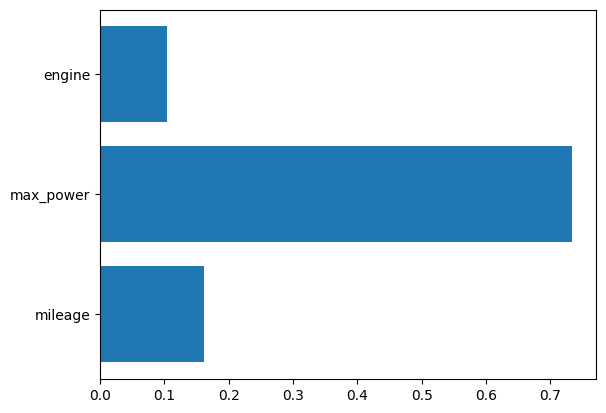

In [135]:
#let's plot
plt.barh(X.columns, rf.feature_importances_)

PERMUTATION WAY

Text(0.5, 0, 'Random Forest Feature Importance')

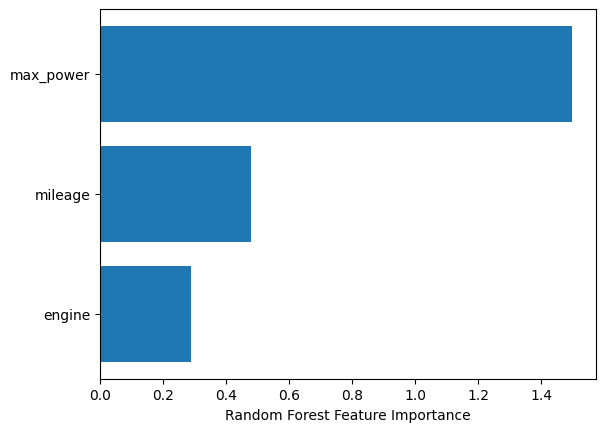

In [136]:
from sklearn.inspection import permutation_importance

perm_importance = permutation_importance(rf, X_test, y_test)

#let's plot
sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(X.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

Text(0.5, 0, 'Random Forest Feature Importance')

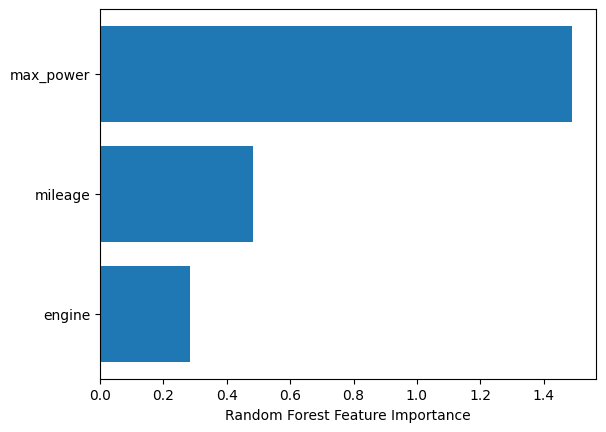

In [137]:
from sklearn.inspection import permutation_importance

perm_importance = permutation_importance(rf, X_test, y_test)

#let's plot
sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(X.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

INFERENCE

In [138]:
import pickle

In [139]:
#saving the model
pickle.dump(model, open('car-price.pkl', 'wb'))

In [140]:
#reloading the model
pickled_model = pickle.load(open('car-price.pkl', 'rb'))

In [141]:
# Loading the model and scaler to test
loaded_model = pickled_model['model']
loaded_scaler = pickled_model['scaler']

In [142]:
# creating an example on the values of the features 
df[['mileage', 'max_power', 'engine', 'selling_price']].loc[1]

mileage            21.140000
max_power         103.520000
engine           1498.000000
selling_price      12.821258
Name: 1, dtype: float64

In [143]:
# milage, max_power, engine chosen features 
sample = np.array([[21.14, 103.52, 1498.00]])
# Scaling the sample data to feed the model
sample_s = loaded_scaler.transform(sample)
sample_s

array([[0.43482181, 0.33108062, 0.08020369]])

In [144]:
predicted_car_price = loaded_model.predict(sample_s)
predicted_car_price = np.exp(predicted_car_price)
predicted_car_price

array([486315.62120014])

REPORT:

In this project of predicting the price of the car, I have used the regression model. 

I have chosen three features based on which the target 'selling-price' will be predicted. Three major features that affect the selling price , according to my analysis, are mileage, max_power and engine. After carrying out data cleansing and creating a correlation matrix and pps score, the features were selected. The domain knowledge and real life scenarios also accounted for dropping some features although they had high correlation coefficient i.e. 'year'.

The following are the scores of several Regression Models;

Linear Regression - Score: [-0.27372239 -0.27921256 -0.27775293 -0.2912391  -0.28574315]; Mean: -0.2815340250447179
SVR - Score: [-0.24318715 -0.22640495 -0.23269069 -0.22694568 -0.21363753]; Mean: -0.2285732002254774
KNeighbors Regressor - Score: [-0.1190244  -0.12066227 -0.09982727 -0.12014811 -0.10370714]; Mean: -0.11267383850394541
Decision-Tree Regressor - Score: [-0.09983835 -0.09567159 -0.10206853 -0.10723007 -0.12298459]; Mean: -0.10555862504251504
Random-Forest Regressor - Score: [-0.09422222 -0.0816149  -0.10019658 -0.11130744 -0.07806822]; Mean: -0.09308187336524078

Based on this output, Random Forest Regressor is the best performer among the lot, followed by Decision Tree Regressor. Here, Linear Regressor model is the least best one.